In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
#stats
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import logit
#plotting libraries
import matplotlib.pyplot as plt
from plotnine import * 

#https://www.statsmodels.org/dev/examples/notebooks/generated/discrete_choice_example.html
#practice based on model at website

Unable to open EPSG support file gcs.csv.  Try setting the GDAL_DATA environment variable to point to the directory containing EPSG csv files.


In [2]:
print( sm.datasets.fair.NOTE)

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
          

In [10]:
dta['affair'] = (dta['affairs'] > 0).astype(float)
print(dta.head(10))

   rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0         2.0   
1            3.0  27.0         13.0       3.0        1.0  14.0         3.0   
2            4.0  22.0          2.5       0.0        1.0  16.0         3.0   
3            4.0  37.0         16.5       4.0        3.0  16.0         5.0   
4            5.0  27.0          9.0       1.0        1.0  14.0         3.0   
5            4.0  27.0          9.0       0.0        2.0  14.0         3.0   
6            5.0  37.0         23.0       5.5        2.0  12.0         5.0   
7            5.0  37.0         23.0       5.5        2.0  12.0         2.0   
8            3.0  22.0          2.5       0.0        2.0  12.0         3.0   
9            3.0  27.0          6.0       0.0        1.0  16.0         3.0   

   occupation_husb   affairs  affair  
0              5.0  0.111111     1.0  
1              4.0  3.230769     1.0  
2              5.0  1.40

In [3]:
dta = sm.datasets.fair.load_pandas().data

Text(0, 0.5, 'Frequency')

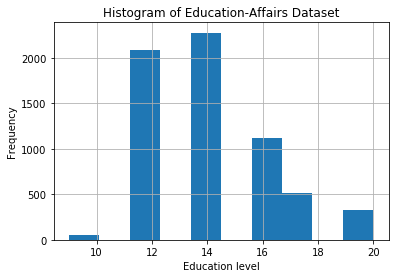

In [4]:
# Histogram of Education
dta.educ.hist()
plt.title("Histogram of Education-Affairs Dataset")
plt.xlabel("Education level")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

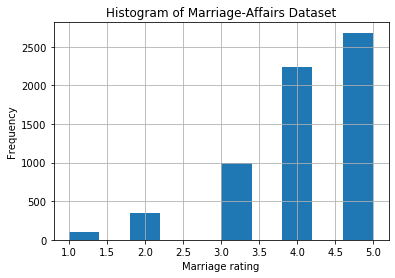

In [6]:
# Histogram of Marriage satisfaction
dta.rate_marriage.hist()
plt.title("Histogram of Marriage-Affairs Dataset")
plt.xlabel("Marriage rating")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

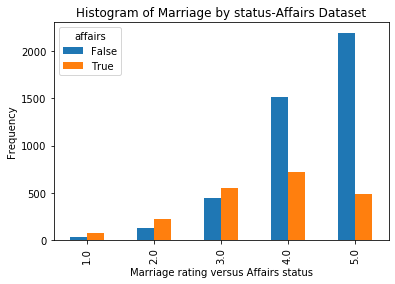

In [7]:
pd.crosstab(dta.rate_marriage,dta.affairs.astype(bool)).plot(kind="bar")
plt.title("Histogram of Marriage by status-Affairs Dataset")
plt.xlabel("Marriage rating versus Affairs status")
plt.ylabel("Frequency")

C:\Users\phant\Miniconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 38'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


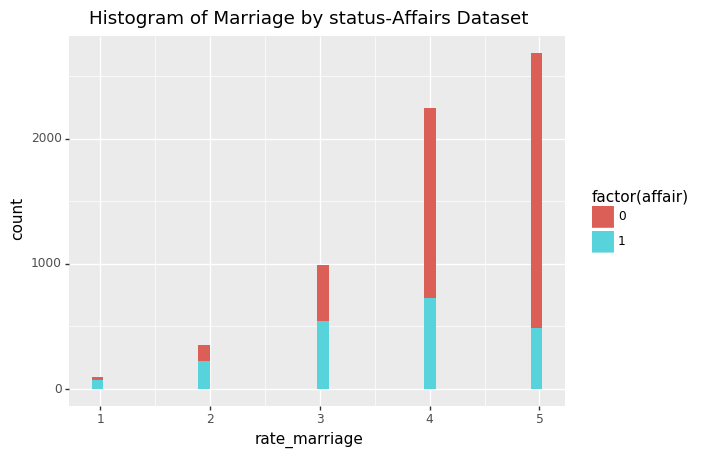

<ggplot: (-9223371920859119307)>

In [13]:
#ggplot style
(ggplot (dta)
 + geom_histogram(aes('rate_marriage',fill='factor(affair)'))
)+ggtitle('Histogram of Marriage by status-Affairs Dataset')

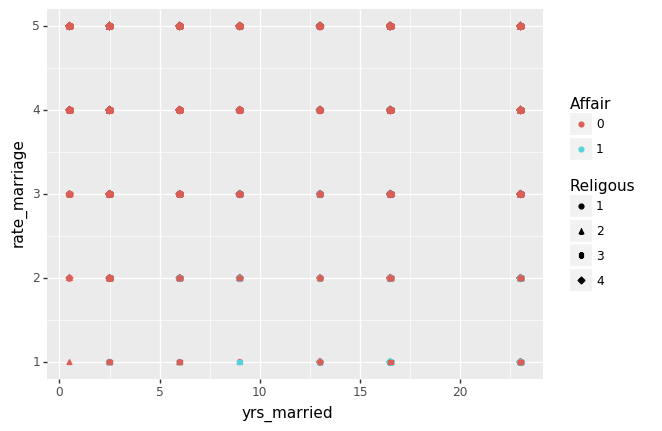

<ggplot: (115995656512)>

In [11]:
#ggplot style
(ggplot (dta)
 + geom_point(aes('yrs_married', 'rate_marriage',color='factor(affair)',shape='factor(religious)'))
)+labs(color="Affair",shape='Religous')

In [5]:
#affair is transformed into binary variable for logistic regression
affair_mod = logit("affair ~ occupation + educ + occupation_husb"
                   "+ rate_marriage + age + yrs_married + children"
                   " + religious", dta).fit()

Optimization terminated successfully.
         Current function value: 0.545314
         Iterations 6


In [6]:
print(affair_mod.summary())

                           Logit Regression Results                           
Dep. Variable:                 affair   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6357
Method:                           MLE   Df Model:                            8
Date:                Thu, 14 May 2020   Pseudo R-squ.:                  0.1327
Time:                        22:17:02   Log-Likelihood:                -3471.5
converged:                       True   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                5.807e-224
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.7257      0.299     12.470      0.000       3.140       4.311
occupation          0.1602      0.034      4.717      0.000       0.094       0.227
educ               -0.0392      

In [7]:
affair_mod.pred_table()

array([[3882.,  431.],
       [1326.,  727.]])

In [8]:
mfx = affair_mod.get_margeff()
print(mfx.summary())

        Logit Marginal Effects       
Dep. Variable:                 affair
Method:                          dydx
At:                           overall
                     dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
occupation          0.0293      0.006      4.744      0.000       0.017       0.041
educ               -0.0072      0.003     -2.538      0.011      -0.013      -0.002
occupation_husb     0.0023      0.004      0.541      0.589      -0.006       0.010
rate_marriage      -0.1308      0.005    -26.891      0.000      -0.140      -0.121
age                -0.0110      0.002     -5.937      0.000      -0.015      -0.007
yrs_married         0.0201      0.002     10.327      0.000       0.016       0.024
children           -0.0008      0.006     -0.134      0.893      -0.012       0.011
religious          -0.0685      0.006    -11.119      0.000      -0.081      -0.056


In [9]:
respondent1000 = dta.iloc[[1000]]
affair_mod.predict(respondent1000)

1000    0.518782
dtype: float64

In [10]:
affair_mod.fittedvalues[1000]

0.07516159285059443

In [11]:
affair_mod.model.cdf(affair_mod.fittedvalues[1000])

0.5187815572121549

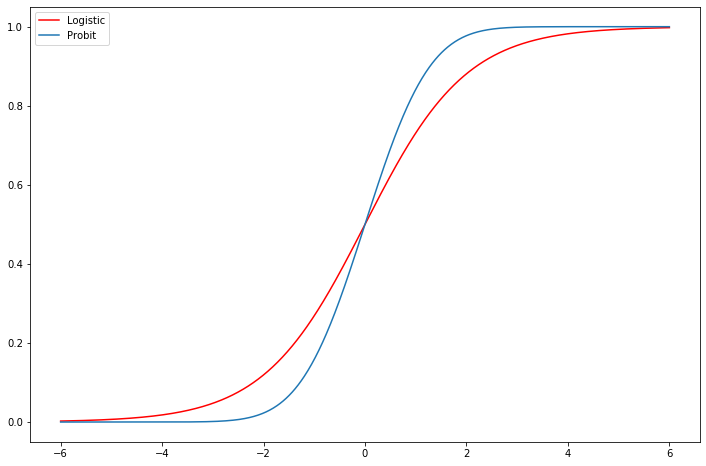

In [12]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
support = np.linspace(-6, 6, 1000)
ax.plot(support, stats.logistic.cdf(support), 'r-', label='Logistic')
ax.plot(support, stats.norm.cdf(support), label='Probit')
ax.legend();

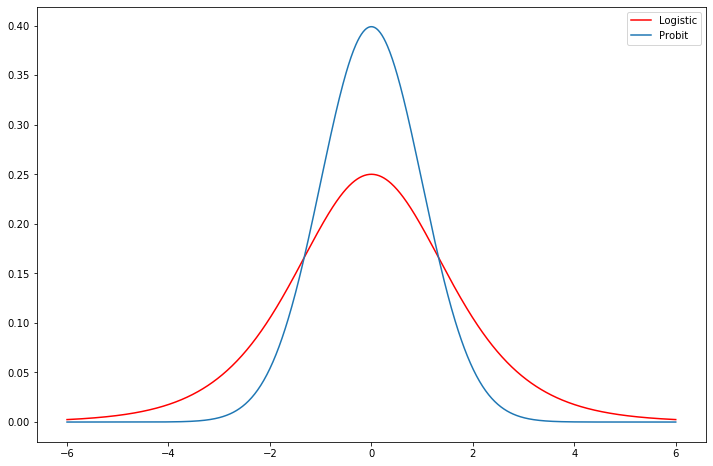

In [13]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
support = np.linspace(-6, 6, 1000)
ax.plot(support, stats.logistic.pdf(support), 'r-', label='Logistic')
ax.plot(support, stats.norm.pdf(support), label='Probit')
ax.legend();